In [2]:
import numpy as np

import numpy as np
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import umap
from torch.nn.functional import mse_loss
from tqdm import tqdm
from sklearn.decomposition import PCA

from autoencoder import NonLinearAutoencoder
from solver import *

In [5]:
def load_model(model_path, model_type, epoch):
    n_input = 28*28
    n_layers = 3
    sae_n_hidden_ls = [512, 128, 32]

    size_ls = [4, 4, 4, 4, 4, 10,
            10, 10, 10, 10, 16, 16,
            16, 16, 16, 16, 16, 24,
            24, 24, 24, 24, 24, 24, 
            32, 32, 32, 32, 32, 32,
            32, 32, 32, 32, 32, 32, 
            32, 32, 32, 32, 32, 32, 
            32, 32, 32, 32, 32, 32, 
            32, 32]
    
    dae_n_hidden_ls = [512, 128, size_ls[epoch]]
    
    if model_type == 'SAE':
        model = NonLinearAutoencoder(n_input, sae_n_hidden_ls, n_layers)
    else:
        model = NonLinearAutoencoder(n_input, dae_n_hidden_ls, n_layers)
    weights = torch.load(f"{model_path}/{model_type}/model_weights_epoch{epoch}.pth")
    model.load_state_dict(weights)
    return model

In [23]:
average_last_losses = {}

for ae_type in ['SAE', 'DAE']:
    last_losses = []
    
    for model_id in range(10):
        file_path = f'/home/david/sparsify_models/nl_models/{model_id}/{ae_type}/all_train_losses.npy'
        # losses = np.load(file_path)
        # # Average loss in the last training epoch
        # last_loss = np.mean(losses[-1])
        # last_losses.append(last_loss)

        ae = load_model(f'/home/david/sparsify_models/nl_models/{model_id}', ae_type, 0)
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        ae.to(device)
        last_losses.append(test(ae, test_loader, device)[0])
    
    average_last_losses[ae_type] = np.mean(last_losses)

for ae_type, avg_loss in average_last_losses.items():
    print(f"{ae_type}: Average Training Loss = {avg_loss:.5f}")

/tmp/ipykernel_36147/2844949028.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights = torch.load(f"{model_path}/{model_type}/model_weights_epoch{epoch}.pth")


====> Test set loss: 0.0869
====> Test set loss: 0.0838
====> Test set loss: 0.0908
====> Test set loss: 0.0858
====> Test set loss: 0.0878
====> Test set loss: 0.0814
====> Test set loss: 0.0896
====> Test set loss: 0.0870
====> Test set loss: 0.0840
====> Test set loss: 0.0816
====> Test set loss: 0.1180
====> Test set loss: 0.1171
====> Test set loss: 0.1166
====> Test set loss: 0.1170
====> Test set loss: 0.1179
====> Test set loss: 0.1187
====> Test set loss: 0.1171
====> Test set loss: 0.1161
====> Test set loss: 0.1187
====> Test set loss: 0.1165
SAE: Average Training Loss = 0.08586
DAE: Average Training Loss = 0.11737


In [18]:
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
train_loader = DataLoader(mnist_train, batch_size=128, shuffle=True, num_workers=6)

mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
test_loader = DataLoader(mnist_test, batch_size=128, shuffle=False, num_workers=6)

In [15]:
average_last_losses = {}
for ae_type in ['SAE', 'DAE']:
    last_losses = []
    
    for model_id in range(10):
        file_path = f'/home/david/sparsify_models/nl_models/{model_id}/'
        print(file_path, ae_type)
        model = load_model(file_path, ae_type, 4)
        # Average loss in the last training epoch
        test_loss, _, _ = test(model, test_loader, device='cpu')
        last_losses.append(test_loss)
    
    average_last_losses[ae_type] = np.mean(last_losses)

for ae_type, avg_loss in average_last_losses.items():
    print(f"{ae_type}: Average Test Loss = {avg_loss:.5f}")

/home/david/sparsify_models/nl_models/0/ SAE


/tmp/ipykernel_36147/2844949028.py:22: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights = torch.load(f"{model_path}/{model_type}/model_weights_epoch{epoch}.pth")


====> Test set loss: 0.0810
/home/david/sparsify_models/nl_models/1/ SAE
====> Test set loss: 0.0779
/home/david/sparsify_models/nl_models/2/ SAE
====> Test set loss: 0.0840
/home/david/sparsify_models/nl_models/3/ SAE
====> Test set loss: 0.0790
/home/david/sparsify_models/nl_models/4/ SAE
====> Test set loss: 0.0805
/home/david/sparsify_models/nl_models/5/ SAE
====> Test set loss: 0.0750
/home/david/sparsify_models/nl_models/6/ SAE
====> Test set loss: 0.0832
/home/david/sparsify_models/nl_models/7/ SAE
====> Test set loss: 0.0807
/home/david/sparsify_models/nl_models/8/ SAE
====> Test set loss: 0.0765
/home/david/sparsify_models/nl_models/9/ SAE
====> Test set loss: 0.0734
/home/david/sparsify_models/nl_models/0/ DAE
====> Test set loss: 0.0908
/home/david/sparsify_models/nl_models/1/ DAE
====> Test set loss: 0.0946
/home/david/sparsify_models/nl_models/2/ DAE
====> Test set loss: 0.0870
/home/david/sparsify_models/nl_models/3/ DAE
====> Test set loss: 0.0882
/home/david/sparsify_mo

In [7]:
def count_autoencoder_params(layers):
    total_params = 0
    
    for i in range(len(layers) - 1):
        weights = layers[i] * layers[i + 1]  # Connections between layers
        biases = layers[i + 1]  # Bias for each neuron in the next layer
        total_params += weights + biases
    
    return total_params

size_ls = [4, 4, 4, 4, 4, 10,
    10, 10, 10, 10, 16, 16,
    16, 16, 16, 16, 16, 24,
    24, 24, 24, 24, 24, 24, 
    32, 32, 32, 32, 32, 32,
    32, 32, 32, 32, 32, 32, 
    32, 32, 32, 32, 32, 32, 
    32, 32, 32, 32, 32, 32, 
    32, 32]

bottleneck_parameters = []
for bottleneck_size in size_ls:
    layers = [784, 512, 128, bottleneck_size, 128, 512, 784]
    params = count_autoencoder_params(layers)
    bottleneck_parameters.append(params)

cumulative_params = np.cumsum(bottleneck_parameters)

In [8]:
def plot_accuracy(model_type, sae_train_loss, dae_train_loss, x_count=np.arange(0, 18750)):
    plt.rc('font', size=16)
    plt.figure(figsize=(4, 4), dpi=300)
    plt.plot(x_count, sae_train_loss, label='SAE')
    plt.plot(x_count, dae_train_loss, label='DAE')
    plt.legend()
    
    if x_count[-1] == 18749:
        x_axis_type = 'training_steps'
        plt.xticks([0, 10000, 20000])
        plt.yticks([0, 0.1])
        plt.xlabel('Training Steps')
    else:
        x_axis_type = 'parameters'
        plt.xticks([0, 2e7, 4e7], ["0", "2×10⁷", "4×10⁷"])
        plt.yticks([0, 0.1])
        plt.xlabel('Cumulative Parameters')
    
    plt.ylabel('MSE Loss')
    plt.tight_layout()

    if model_type == 'l_models':
        model_type = 'l'
    else:
        model_type = 'nl'
    plt.savefig(f'Plots/{model_type}_accuracy_over_{x_axis_type}.png', bbox_inches='tight', dpi=300)
    plt.show()

In [9]:
def get_average_train_loss(model_type, variant, num_models = 10):
    model_losses = []
    
    for model_id in range(num_models):
        file_path = f'/home/david/sparsify_models/{model_type}/{model_id}/{variant}/'
        train_losses = np.load(file_path + 'all_train_losses.npy')
        train_losses = np.concatenate(train_losses)
        model_losses.append(train_losses)
    
    model_losses_array = np.array(model_losses)
    avg_loss = np.mean(model_losses_array, axis=0)
    return avg_loss

In [10]:
def get_train_loss_per_epoch(model_type, variant, num_models = 10):
    model_losses = []
    
    for model_id in range(num_models):
        file_path = f'/home/david/sparsify_models/{model_type}/{model_id}/{variant}/'
        train_losses = np.load(file_path + 'all_train_losses.npy')
        avg_train_loss_epoch = np.mean(train_losses, axis=1)
        model_losses.append(avg_train_loss_epoch)
    
    model_losses_array = np.array(model_losses)
    avg_loss = np.mean(model_losses_array, axis=0)
    return avg_loss

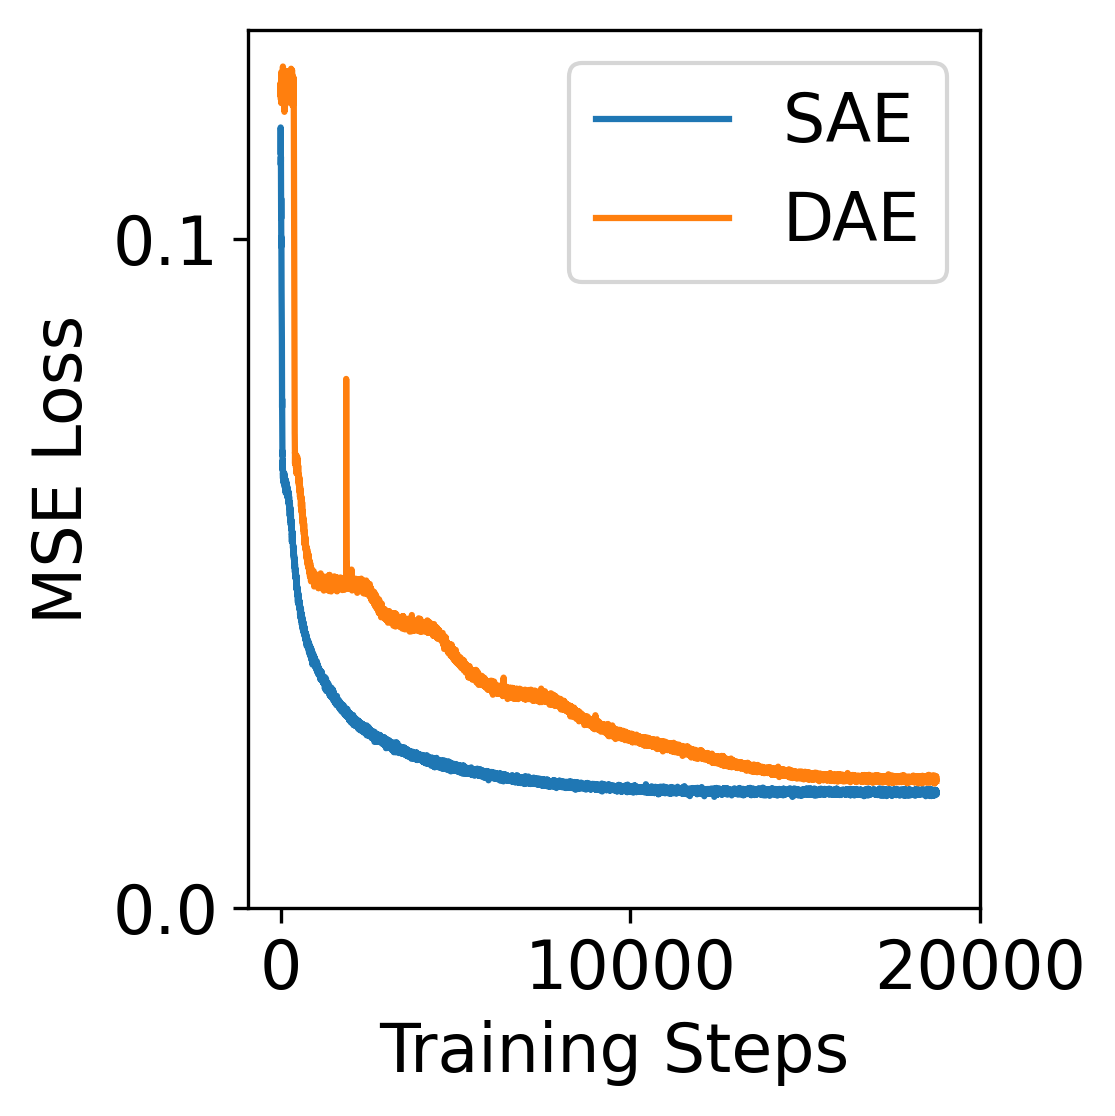

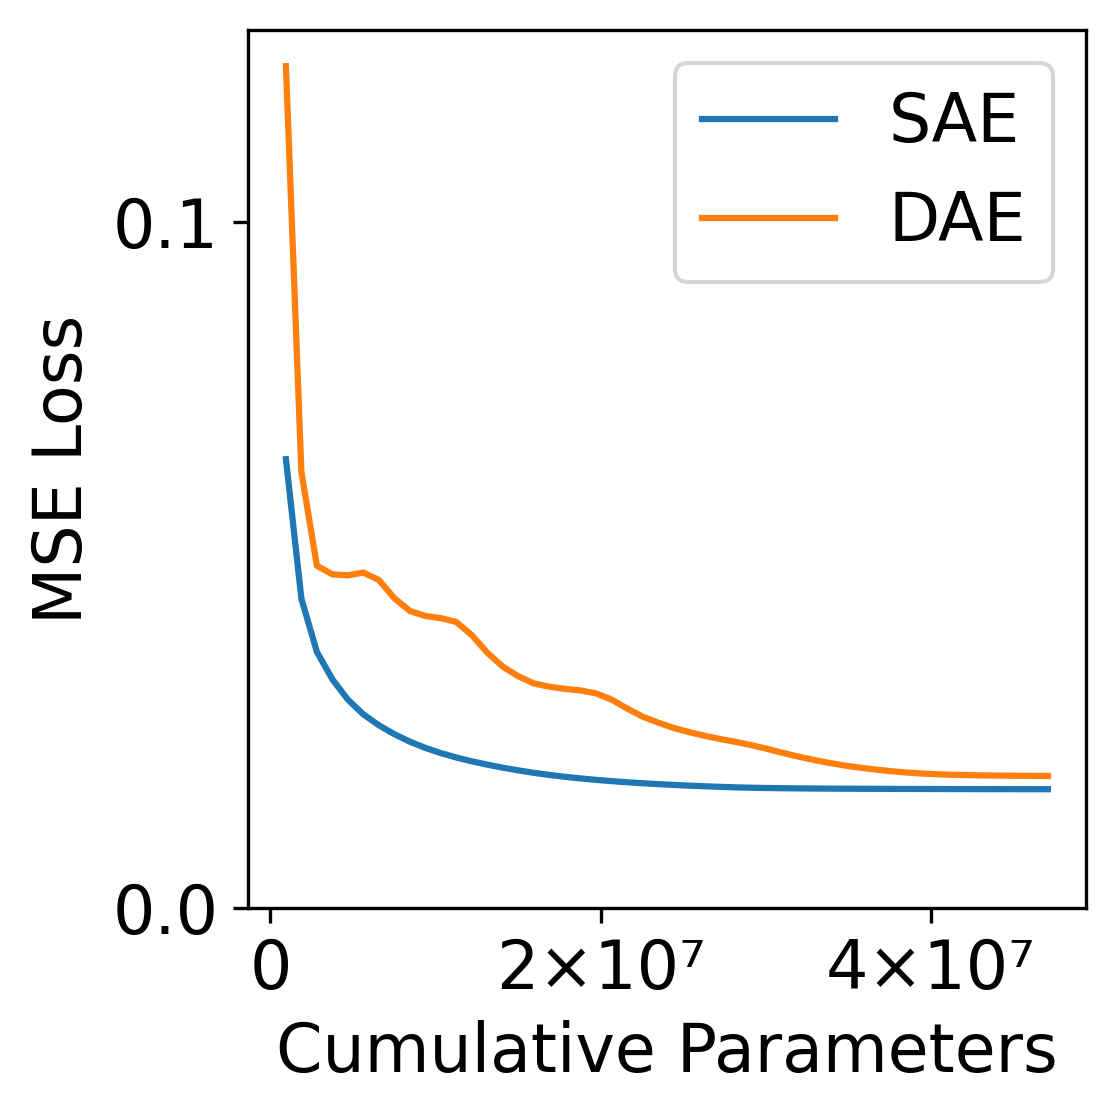

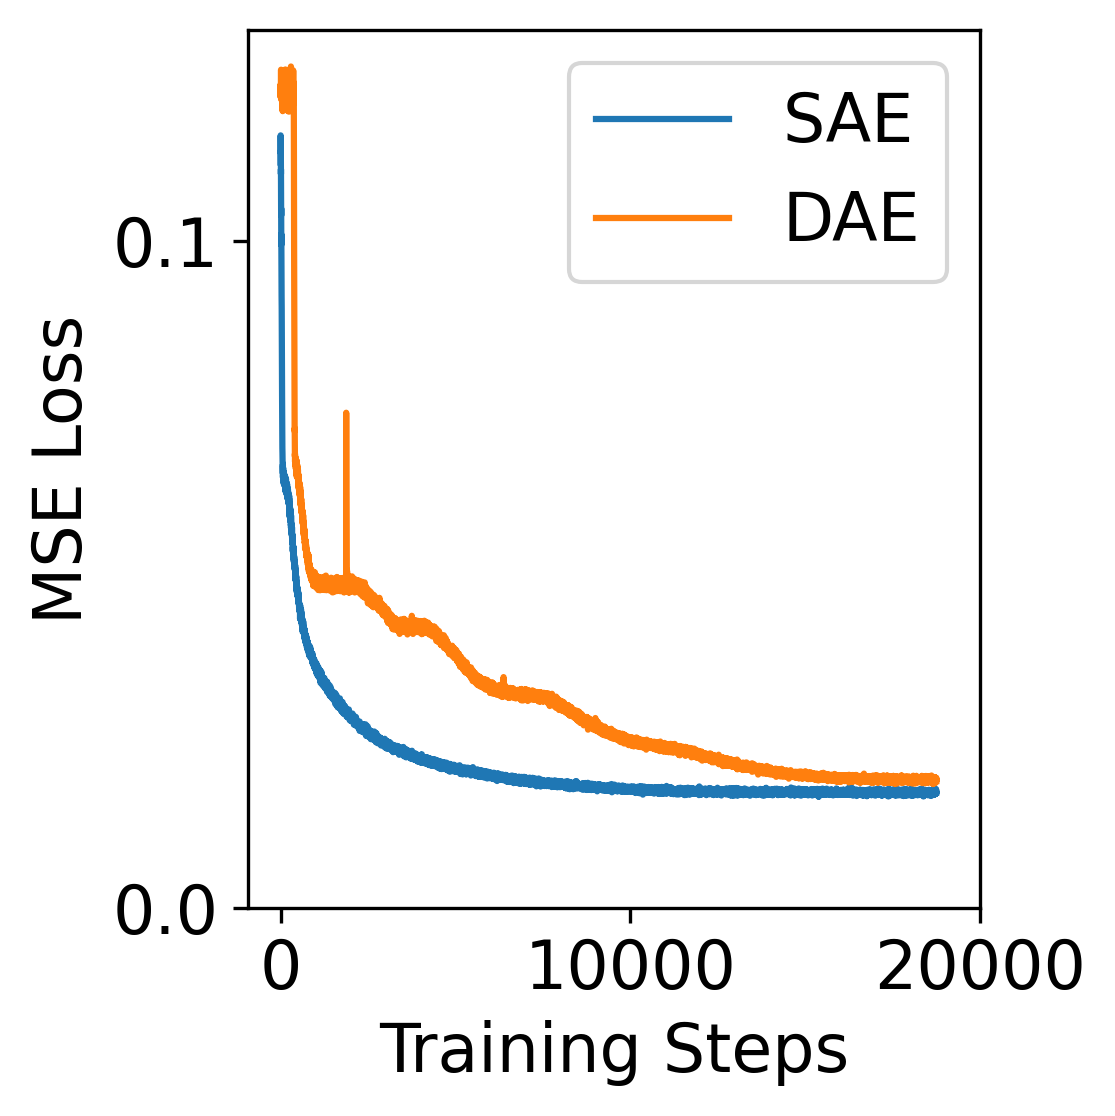

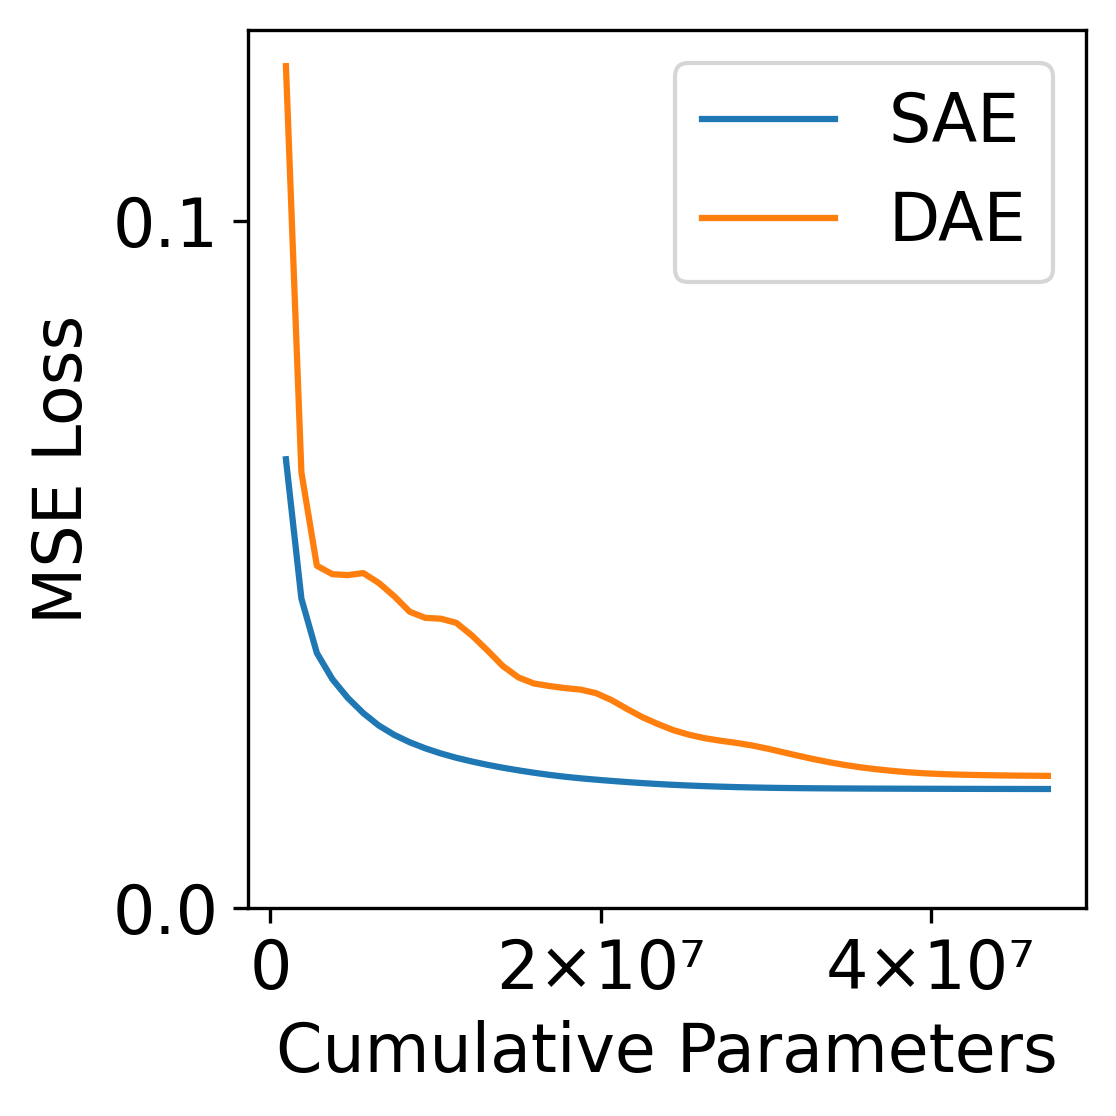

In [11]:
def create_plots():
    for model_type in ['l_models', 'nl_models']:
        sae_train_loss = get_average_train_loss(model_type, 'SAE')
        dae_train_loss = get_average_train_loss(model_type, 'DAE')
        plot_accuracy(model_type, sae_train_loss, dae_train_loss)

        sae_train_loss = get_train_loss_per_epoch(model_type, 'SAE')
        dae_train_loss = get_train_loss_per_epoch(model_type, 'DAE')
        plot_accuracy(model_type, sae_train_loss, dae_train_loss, x_count=cumulative_params)

create_plots()